## Big Data Mart Sales Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
train_df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Practice Projects\\bigdatamart_Train.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test_df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Practice Projects\\bigdatamart_Test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [5]:
train_df.shape

(8523, 10)

In [6]:
test_df.shape

(5681, 11)

In [7]:
train_df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(train_df['Item_Weight'].median())
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode())

In [13]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
train_df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [15]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
train_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
train_df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [19]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [20]:
train_df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [21]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [22]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

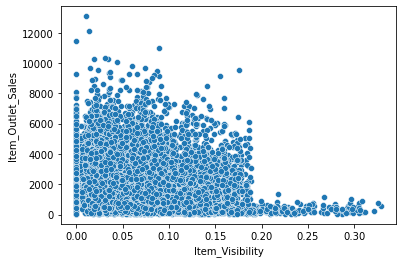

In [23]:
sns.scatterplot(x=train_df['Item_Visibility'],y=train_df['Item_Outlet_Sales'])

### There is no significant relation between visibility and sales

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

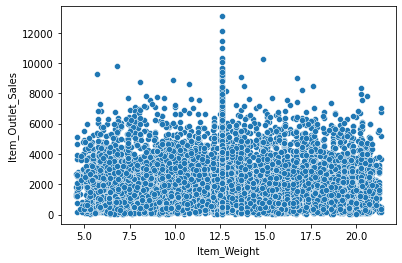

In [24]:
sns.scatterplot(x=train_df['Item_Weight'],y=train_df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

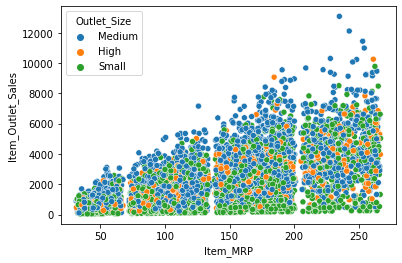

In [25]:
sns.scatterplot(x=train_df['Item_MRP'],y=train_df['Item_Outlet_Sales'],hue=train_df['Outlet_Size'])

### There is some part of linear relation between item cost and sales

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

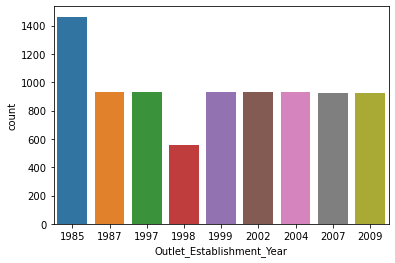

In [26]:
sns.countplot(train_df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

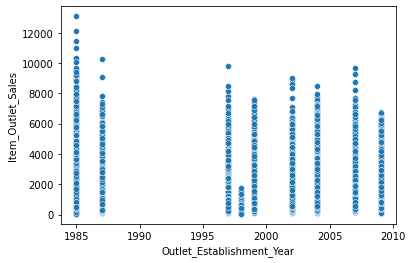

In [27]:
sns.scatterplot(x=train_df['Outlet_Establishment_Year'],y=train_df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

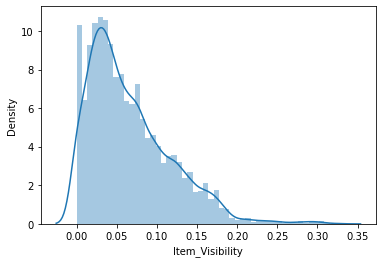

In [28]:
sns.distplot(train_df['Item_Visibility'])

### Item visibility is right skewed

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

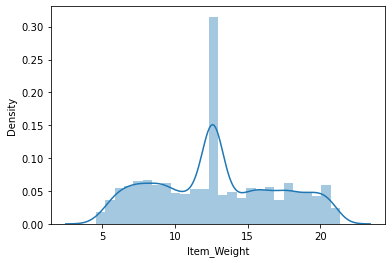

In [29]:
sns.distplot(train_df['Item_Weight'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

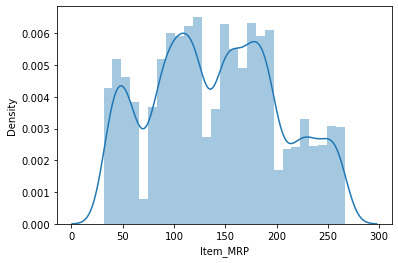

In [30]:
sns.distplot(train_df['Item_MRP'])

### Item mrp is not normally distributed

<AxesSubplot:xlabel='Item_Weight'>

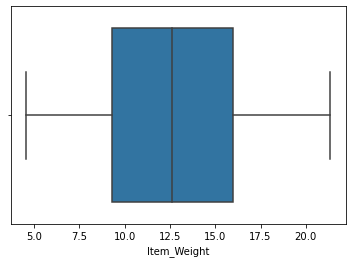

In [31]:
sns.boxplot(train_df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

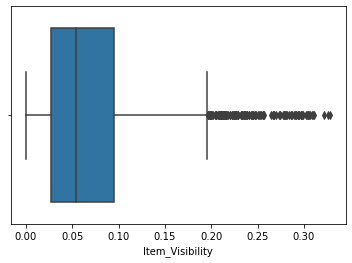

In [32]:
sns.boxplot(train_df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

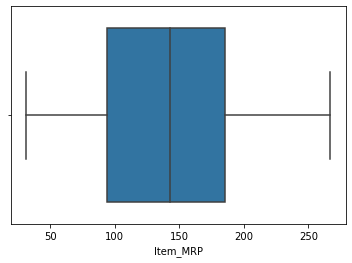

In [33]:
sns.boxplot(train_df['Item_MRP'])

## Encoding

In [34]:
lis=['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type','Outlet_Size']
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in lis:
    train_df[i]=lab.fit_transform(train_df[i].values.reshape(-1,1))

In [35]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,4,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,8,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,4,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,3,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


## Correlation

In [36]:
cor=train_df.corr()
cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021092,-0.014168,0.028038,0.024951,0.007040,-0.011120,0.001958,-0.009973,0.009693
Item_Fat_Content,-0.021092,1.000000,0.047314,-0.139434,0.006063,0.002447,-0.001365,-0.001598,0.002199,0.018719
Item_Visibility,-0.014168,0.047314,1.000000,-0.035249,-0.001315,-0.082927,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,0.028038,-0.139434,-0.035249,1.000000,0.032651,0.006527,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.024951,0.006063,-0.001315,0.032651,1.000000,0.004162,-0.002473,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,0.007040,0.002447,-0.082927,0.006527,0.004162,1.000000,0.360690,0.042005,-0.040040,-0.025525
Outlet_Size,-0.011120,-0.001365,0.087796,0.000827,-0.002473,0.360690,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.001958,-0.001598,-0.028099,0.003084,0.000232,0.042005,-0.290216,1.000000,0.467219,0.089367
Outlet_Type,-0.009973,0.002199,-0.173468,0.003053,-0.001975,-0.040040,-0.432062,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.009693,0.018719,-0.128625,0.017048,0.567574,-0.025525,-0.172477,0.089367,0.401522,1.000000


<AxesSubplot:>

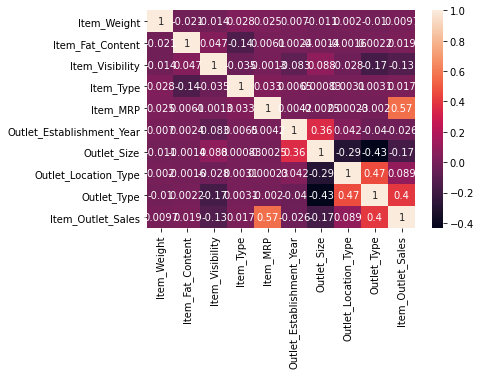

In [37]:
sns.heatmap(cor,annot=True)

### We can drop item_fat_content, item_type, Outlet_Establishment_Year, Location_type because these columns are having very less correlation with Outlet_sales

In [38]:
train_df.drop(['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Location_Type'],axis=1,inplace=True)

## Outliers Removal

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(train_df))
train_ndf=train_df[(z<3).all(axis=1)]
train_ndf.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1,1,3735.1380
1,5.92,0.019278,48.2692,1,2,443.4228
2,17.50,0.016760,141.6180,1,1,2097.2700
3,19.20,0.000000,182.0950,3,0,732.3800
4,8.93,0.000000,53.8614,0,1,994.7052


In [40]:
train_ndf.shape

(8338, 6)

In [41]:
train_df.shape

(8523, 6)

In [42]:
dataloss=(8532-8338)/8532
print(dataloss*100)

2.273792780121894


## Skewness

In [43]:
train_ndf.skew()

Item_Weight          0.118615
Item_Visibility      0.794272
Item_MRP             0.138990
Outlet_Size         -0.130159
Outlet_Type          0.956727
Item_Outlet_Sales    0.878267
dtype: float64

In [44]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
t=['Item_Visibility','Outlet_Type']
for i in t:
    train_ndf[i] = pt.fit_transform(np.array(train_ndf[i]).reshape(-1,1))[:,0]

In [45]:
train_ndf.skew()

Item_Weight          0.118615
Item_Visibility      0.115911
Item_MRP             0.138990
Outlet_Size         -0.130159
Outlet_Type          0.010691
Item_Outlet_Sales    0.878267
dtype: float64

In [46]:
x=train_ndf.drop(['Item_Outlet_Sales'],axis=1)
y=train_ndf['Item_Outlet_Sales']

## Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=pd.DataFrame(mms.fit_transform(x),columns=x.columns)

In [48]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type
0,0.282525,0.150492,0.927507,0.333333,0.467328
1,0.081274,0.178270,0.072068,0.333333,0.770430
2,0.770765,0.156689,0.468288,0.333333,0.467328
3,0.871986,0.000000,0.640093,1.000000,0.000000
4,0.260494,0.000000,0.095805,0.000000,0.467328


## Choosing Random State Value

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.5291848028345161 ran state= 50


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

### Lasso

In [52]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'fit_intercept': True, 'random_state': 0, 'selection': 'random'}


In [53]:
ls = Lasso(alpha=0.1,fit_intercept=True,random_state=0,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

52.918880045530145

### Ridge

In [54]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'max_iter': 1, 'normalize': True}


In [55]:
rd = Ridge(alpha=0.001,copy_X=True,max_iter=1,normalize=True)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

52.91562238325652

### Linear Regression

In [56]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [57]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

52.91848028345161

### Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,11)),'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}


In [59]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=5,max_features='auto',splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

60.687975993521334

## Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y,cv=3).mean())*100
cv2=(cross_val_score(rd,x,y,cv=3).mean())*100
cv3=(cross_val_score(lr,x,y,cv=3).mean())*100
cv4=(cross_val_score(dtr,x,y,cv=3).mean())*100
print(cv1,cv2,cv3,cv4)

49.74237127957388 49.742351603265874 49.742250973963046 57.82284723510948


In [61]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

3.176508765956264 3.173270779990645 3.176229309488562 2.8651287584118563


### We can choose Decision Tree Regressor as our model, since its r2 score and cv_score are almost similar.

## Model Selection

In [62]:
fin_itemsales=DecisionTreeRegressor(criterion='friedman_mse',max_depth=5,max_features='auto',splitter='best')
fin_itemsales.fit(x_train,y_train)
pred=fin_itemsales.predict(x_test)
dtr_r2=r2_score(y_test,pred)
dtr_r2*10

6.068797599352134

## Predicting Test data

## Encoding Test Data

In [63]:
lis=['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Type','Outlet_Location_Type','Outlet_Size']
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in lis:
    test_df[i]=lab.fit_transform(test_df[i].values.reshape(-1,1))

In [64]:
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [65]:
test_df.isnull().sum()

Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [66]:
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(test_df['Item_Weight'].median())

In [67]:
test_df.drop(['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Location_Type'],axis=1,inplace=True)

In [68]:
y_test=fin_itemsales.predict(test_df)

In [69]:
y_test

array([4106.9873    , 4106.9873    ,  597.95848421, ..., 4106.9873    ,
       4106.9873    , 4106.9873    ])

In [70]:
test_df['Item_Outlet_Sales']=y_test
test_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,20.750,0.007565,107.8622,1,1,4106.987300
1,8.300,0.038428,87.3198,3,1,4106.987300
2,14.600,0.099575,241.7538,3,0,597.958484
3,7.315,0.015388,155.0340,3,1,4106.987300
4,12.500,0.118599,234.2300,1,3,4106.987300


## Saving The Model

In [71]:
import joblib
joblib.dump(fin_itemsales,'Final_itemsales_mod.pkl')

['Final_itemsales_mod.pkl']